In [ ]:
# import os
# os.cpu_count()
!nvidia-smi

Wed Nov 30 08:46:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf

# import tensorflow layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [ ]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape) # 4차원 Tensor
## 32 x 32 x 3(RGB-channel) -> 이미지당 pixel 개수.
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Preprocessing

Input Normalization

In [ ]:
# min-max scaling
import matplotlib.pyplot as plt

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

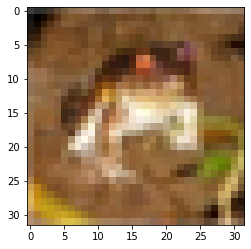

In [ ]:
plt.imshow(X_train[0])

### Training with Vanilla CNN

**Model Architecture**

> Conv - Relu - Conv - Relu - FC - FC


In [ ]:
# Sequential 객체를 이용하여 layer를 쌓아올려 모델을 만듭니다.
model = Sequential([
    Input(shape=(32, 32, 3)),


    Conv2D(filters=6,
           kernel_size=5,
           strides=1,
           padding='same', # 원본과 동일하게 하기 - 'same'
           activation='relu'),
    Conv2D(16, 5, 1, 'same', activation='relu'),
    MaxPool2D(pool_size=2,
              strides=2),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1024)              4195328   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                        

In [ ]:
# training setup
from tensorflow.keras.optimizers import SGD, Adam

## config variables
batch_size = 256
lr = 1e-5
epochs = 15

# Set optimizer, loss function, metrics, callback function
optimizer = Adam(learning_rate=lr)

# categorical_crossentropy : target value가 이미 one-hot vector인 경우
# sparse_categorical_crossentropy : 그냥 정수

loss_fn = 'sparse_categorical_crossentropy' # multi-class classification
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [ ]:
# model training

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test), # 매 epoch마다 validation 성능 체크 가능!
                    verbose=2)

Epoch 1/15
196/196 - 8s - loss: 2.1285 - accuracy: 0.2518 - val_loss: 1.9513 - val_accuracy: 0.3329 - 8s/epoch - 41ms/step
Epoch 2/15
196/196 - 2s - loss: 1.8607 - accuracy: 0.3582 - val_loss: 1.7777 - val_accuracy: 0.3840 - 2s/epoch - 11ms/step
Epoch 3/15
196/196 - 2s - loss: 1.7388 - accuracy: 0.3978 - val_loss: 1.6962 - val_accuracy: 0.4108 - 2s/epoch - 11ms/step
Epoch 4/15
196/196 - 2s - loss: 1.6693 - accuracy: 0.4192 - val_loss: 1.6427 - val_accuracy: 0.4284 - 2s/epoch - 11ms/step
Epoch 5/15
196/196 - 2s - loss: 1.6170 - accuracy: 0.4371 - val_loss: 1.5934 - val_accuracy: 0.4447 - 2s/epoch - 11ms/step
Epoch 6/15
196/196 - 2s - loss: 1.5744 - accuracy: 0.4495 - val_loss: 1.5622 - val_accuracy: 0.4476 - 2s/epoch - 11ms/step
Epoch 7/15
196/196 - 2s - loss: 1.5395 - accuracy: 0.4618 - val_loss: 1.5242 - val_accuracy: 0.4654 - 2s/epoch - 11ms/step
Epoch 8/15
196/196 - 2s - loss: 1.5103 - accuracy: 0.4706 - val_loss: 1.5067 - val_accuracy: 0.4742 - 2s/epoch - 11ms/step
Epoch 9/15
196/1

In [ ]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Loss : %.4f, Accuracy : %.4f" % (loss, acc))

40/40 [==============================] - 0s 5ms/step - loss: 1.3987 - accuracy: 0.5049
Loss : 1.3987, Accuracy : 0.5049


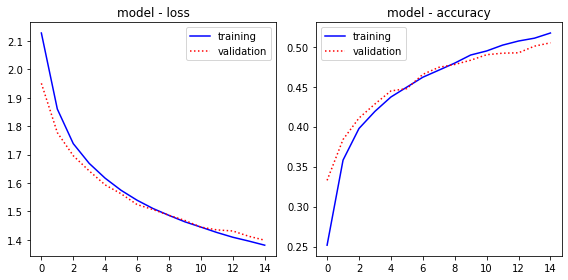

In [ ]:
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(history.history['loss'],'b-', label = "training")
plt.plot(history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(history.history['accuracy'], 'b-', label = "training")
plt.plot(history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()